In [1]:
def calRange(array):
    size = len(array)
    maxInterval = 0
    interval = 0
    headinterval = 0
    for j in range(size):
        if array[j]==0:
            interval+=1
        else:
            if interval>maxInterval:
                maxInterval = interval
            if headinterval==0 and j!=0:
                headinterval= interval
            interval=0
    if headinterval+interval>maxInterval:
        maxInterval = headinterval + interval
    return size - maxInterval

test = [0,0,1,1,0,0,0,1,0,0,0,1,0,0]
print(calRange(test))
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy
import re

def annotateDraw(x,y, color=None, label=None):
    # X_Y_Spline = make_interp_spline(x, y)
    # X_ = np.linspace(min(x), max(x), 500)
    # Y_ = X_Y_Spline(X_)
    # plt.plot(X_,Y_,color=color, label=legend)
    
    plt.plot(x,y,color=color, label=label)
    plt.scatter(x,y,color=color)

def annotate(x,y, color, legend):
    # X_Y_Spline = make_interp_spline(x, y)
    # X_ = np.linspace(min(x), max(x), 500)
    # Y_ = X_Y_Spline(X_)
    # plt.plot(X_,Y_,color=color, label=legend)
    

    plt.scatter(x,y,color=color)


def readG(id, src="data/"):
    src = "data/"

    file = src + f"data{id}.cpp"
    with open(file, 'r') as f:
        content= f.read()
    content = re.findall(r'graph::input_graph.*?;', content)
    def str2G(Hstr):
        Hstr = Hstr.replace('{', '[').replace('}', ']')

        tmp = Hstr.split(', ')
        A = eval(tmp[1])
        B = eval(tmp[2])

        size = max(max(A), max(B))+1
        G = nx.Graph()

        for i in range(len(A)):
            G.add_edge(A[i], B[i])
        return G
    
    Hgraph = content[0]
    Ggraph = content[1]

    Hstr= Hgraph.replace('graph::input_graph triangle(', '').replace(');', '')
    Gstr= Ggraph.replace('graph::input_graph square(', '').replace(');', '')
    return str2G(Hstr), str2G(Gstr)


def dataInfo(id):
    G, T = readG(id)
    # RG = nx.diameter(G)
    degree = [G.degree(node) for node in G.nodes()]
    maxTDegree = max([T.degree(n) for n in T.nodes()])
    Degree_var = np.var(degree)
    size = len(G.nodes())
    Degree_avg = 2*len(G.edges()) / len(G.nodes())
    Degree_max = max([G.degree(i) for i in G.nodes()])
    Type= None
    if maxTDegree==20:
        Type = 'Zephyr' 
    if maxTDegree==15:
        Type = 'Pegasus'
    # print(f"id: {id}, Var_num: {len(G.nodes())}, avg degree {Degree_avg: .3}, variance degree, {Degree_var:.3}")
    info = {'Var_num': size, 'Degree_avg': Degree_avg, 'Degree_variance': Degree_var, 'Degree_max':Degree_max, 'Hardware_size':len(T.nodes()), 'HardwareMaxD': maxTDegree, 'Type':Type}
    return info

def sigDigit(num, r=3):
    return float(f'{float(num):.3}')




10


In [25]:
threadID = 's'
def readThreadsAll(path, t, validSet=None):
    with open(f"{path}/thread{t}", 'r') as f:
        contents = f.readlines()
    failRate={}
    Time= {}
    for line in contents:
        res = line.split(' ')
        if len(res)<6:
            continue
        id = int(res[0])
        if validSet:
            if id not in validSet:
                continue
        id = f"_{t}_{id}"
        if id not in Time.keys():
            Time[id] = [0,0]
        Time[id][0] += float(res[4][:-1])
        Time[id][1] += int(res[6])
    return Time
base = readThreadsAll('baseMinor/examples', threadID)
opt = readThreadsAll('optMinor/examples', threadID)
group5 = []
for k in opt.keys():
    if k not in base.keys():
        continue
    baseData = base[k]
    optData = opt[k]
    baseTime = baseData[0]/baseData[1] 
    optTime = optData[0]/optData[1]
    id = k
    group5.append((id, sigDigit(baseTime), sigDigit(optTime) , -1))
for g in group5:
    print(g)

('s7', 96.5, 71.4, -1)
('s1', 73.0, 21.4, -1)
('s10', 338.0, 94.4, -1)
('s11', 35.8, 23.3, -1)
('s12', 57.3, 30.6, -1)
('s13', 59.3, 39.5, -1)
('s14', 101.0, 57.6, -1)
('s15', 87.9, 55.9, -1)
('s16', 109.0, 83.6, -1)
('s19', 35.6, 25.6, -1)
('s20', 39.1, 25.6, -1)
('s21', 47.9, 29.8, -1)
('s18', 52.4, 31.9, -1)
('s22', 62.4, 32.9, -1)
('s23', 72.8, 35.3, -1)
('s24', 81.7, 66.3, -1)
('s25', 86.8, 68.7, -1)
('s26', 123.0, 119.0, -1)
('s27', 101.0, 62.9, -1)
('s28', 74.4, 38.2, -1)
('s29', 46.5, 42.4, -1)
('s30', 47.8, 37.2, -1)
('s31', 63.8, 39.4, -1)
('s33', 51.0, 38.4, -1)
('s32', 318.0, 85.3, -1)
('s34', 50.7, 46.7, -1)
('s35', 68.9, 45.6, -1)
('s36', 74.1, 44.9, -1)
('s37', 76.6, 47.5, -1)
('s38', 86.2, 69.7, -1)
('s39', 108.0, 68.6, -1)
('s40', 87.3, 56.5, -1)


In [26]:
from collections import OrderedDict

# Erdős–Rényi model k=4
group0 = [(14, 1971*2, 1571*2, 6, 1680, 19.3),
          (18, 2095*2, 1743*2, 6, 1680, 19.8),
          (19, 1870*2, 1552*2, 7, 1680, 19.6),
          (20, 8453*2, 5262*2, 4, 1680, 18.2),
          (21, 15017, 5425*2, 5, 1680, 27.5),
          (22, 3436*2, 2682*2, 6, 1680, 36.4),
          (23, 9156*2, 6523, 4, 1680, 14.6),
          
          (6, 18787, 5497*2, 4, 1680, 19.8, ),
          (24, 8631*2, 4917*2, 6, 1680),
          (25, 7168*2, 5322*2, 6, 1680),
          (34, 1783*2, 1384*2, 5),
          (36,17225*2, 6013*2, 4),
          (37, 2974*2, 1910*2, 4),
          (38, 4206*2, 2384*2, 4),
          (39, 29910*2, 8656,4),
          (41, 9953*2, 4029*2, 4),
          (42, 31055*2, 15601*2,4),
          (43, 5073*2, 3195*2,4),
          ]

# Regular D k=4
group1 = [(28, 12518*2, 8249*2, 5, 1680),
          (29, 5321*2, 3860*2, 5, 1680),
          (30, 2828*2, 2542*2, 6, 1680),
          (31, 13864*2, 9268*2, 5, 1680)]

# QHD
group2 = [(7, 2718, 1766, 3, 880, 17.0),
          (8, 4780, 2595, 2, 1248, 17.1),
          (9, 7155, 3842, 2, 1248, 17.2),
          (10, 28576, 12840, 2, 1680, 17.3), 
          (11, 18409, 8919, 3, 1680, 24.8),
          (12, 6472, 3063, 3, 1680, 24.7),
          (13, 15243, 3816*2, 4, 1680, 32.0)]

# "Barabasi Albert Graph"
group3 = [(15, 2452+2445, 2038*2, 7, 1680, 9.75),
          (16, 1862*2, 1579*2, 7, 1680, 9.75),
          (17, 1836*2, 1570*2, 7, 1680, 9.75)]

# Regular D
group4 = [(26, 2*356, 2*325.6, 6, 1680),
          (27, 2*789.1, 2*718.4, 7, 1680),]

groups = [group0, group1, group2, group3, group4, group5]
aftGroup = []

def parseData(data):
    id = data[0]
    info = dataInfo(id)
    Reduction = 1 - data[2]/data[1]
    newData = OrderedDict([('ID',id), ('Base (s)', data[1]), ('Opt (s)', data[2]), ('Reduction', Reduction), ('Var_num', info['Var_num']), ('Hardware_size', info['Hardware_size']), ('Degree_avg', sigDigit(info['Degree_avg'])), ('Degree_variance', sigDigit(info['Degree_variance'])),('Degree_max', info['Degree_max']), ('Type', info['Type'])])
    return newData

for g in groups:
    res = []
    for data in g:
        newData = parseData(data)
        res.append(newData)
        print(newData)
    res.sort(key=lambda a:a['Reduction'], reverse=True)
    aftGroup.append(res)

OrderedDict([('ID', 14), ('Base (s)', 3942), ('Opt (s)', 3142), ('Reduction', 0.20294266869609334), ('Var_num', 180), ('Hardware_size', 1680), ('Degree_avg', 19.3), ('Degree_variance', 55.4), ('Degree_max', 42), ('Type', 'Zephyr')])
OrderedDict([('ID', 18), ('Base (s)', 4190), ('Opt (s)', 3486), ('Reduction', 0.16801909307875895), ('Var_num', 180), ('Hardware_size', 1680), ('Degree_avg', 19.8), ('Degree_variance', 51.8), ('Degree_max', 34), ('Type', 'Zephyr')])
OrderedDict([('ID', 19), ('Base (s)', 3740), ('Opt (s)', 3104), ('Reduction', 0.17005347593582887), ('Var_num', 180), ('Hardware_size', 1680), ('Degree_avg', 19.6), ('Degree_variance', 41.2), ('Degree_max', 46), ('Type', 'Zephyr')])
OrderedDict([('ID', 20), ('Base (s)', 16906), ('Opt (s)', 10524), ('Reduction', 0.37749911274103864), ('Var_num', 240), ('Hardware_size', 1680), ('Degree_avg', 18.2), ('Degree_variance', 49.9), ('Degree_max', 34), ('Type', 'Zephyr')])
OrderedDict([('ID', 21), ('Base (s)', 15017), ('Opt (s)', 10850), 

FileNotFoundError: [Errno 2] No such file or directory: 'data/datas7.cpp'

In [4]:
aftGroup[5].sort(key=lambda a:a['Var_num']+a['Hardware_size'] / 10000, reverse=True)

groupName = ['Erdős-Rényi Graph (k=4)', ' Random Regular Degree (k=4)', 'QHD - Bandwidth (k=4)', "Barabasi Albert Graph (k=1)", "Random Regular Degree (k=1)", "3-Sat"]
title = ['ID', 'Base (s)', 'Opt (s)', 'Reduction', 'Var_num', 'Hardware_size', 'Degree_avg', 'Degree_variance'] 
title = aftGroup[0][0].keys()
def writeCell(strList, f):
    f.write('| '+' | '.join(strList) + ' |\n')
with open('data.md', 'w') as f:
    f.write(f'# Data\n\n')
    f.write("Execution (s) time of 1000 iterations\n")
    for i in range(len(groupName)):
        g = aftGroup[i]
        print(groupName[i])
        f.write(f"## {groupName[i]}\n\n")
        writeCell(title, f)
        tmp = [':---:' for i in title]
        writeCell(tmp,f)
        for data in g:
            dataStr = [str(data[name]) for name in title]
            dataStr[3] = f'{100*data["Reduction"]:.3}%'
            writeCell(dataStr, f)
        f.write('\n')
        avgReduction = sum([d['Reduction'] for d in g])/len(g)
        f.write(f'Avg Reduction {100*avgReduction:.3}%\n')

Erdős-Rényi Graph (k=4)
 Random Regular Degree (k=4)
QHD - Bandwidth (k=4)
Barabasi Albert Graph (k=1)
Random Regular Degree (k=1)
3-Sat


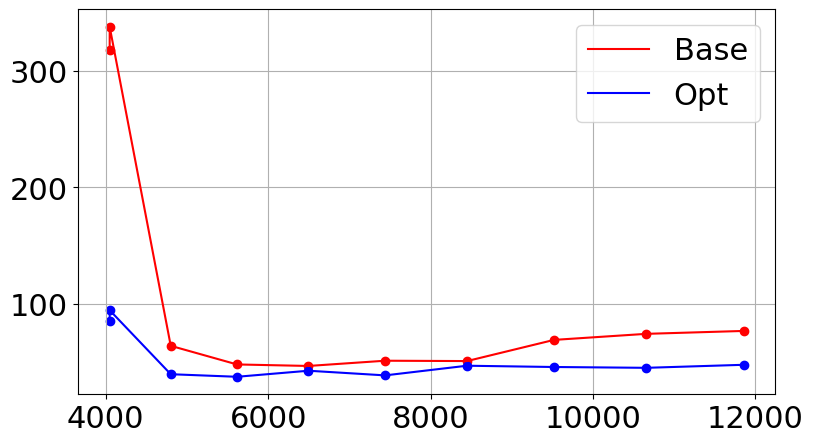

In [23]:
res = []
for g in aftGroup[5]:
    if g['Var_num'] == 1260 and g['Type'] == 'Zephyr':
        res.append(g)
res.sort(key = lambda a : a['Hardware_size'])
x = [a['Hardware_size'] for a in res]
yb = [a['Base (s)'] for a in res]
yo = [a['Opt (s)'] for a in res]
yrd = [(yb[i] - yo[i]) for i in range(len(yo))]
annotateDraw(x,yb,color='red', label='Base')
annotateDraw(x,yo,color='blue', label='Opt')
# annotateDraw(x, yrd, color='green', label='Base - Opt')
plt.grid()
plt.legend()

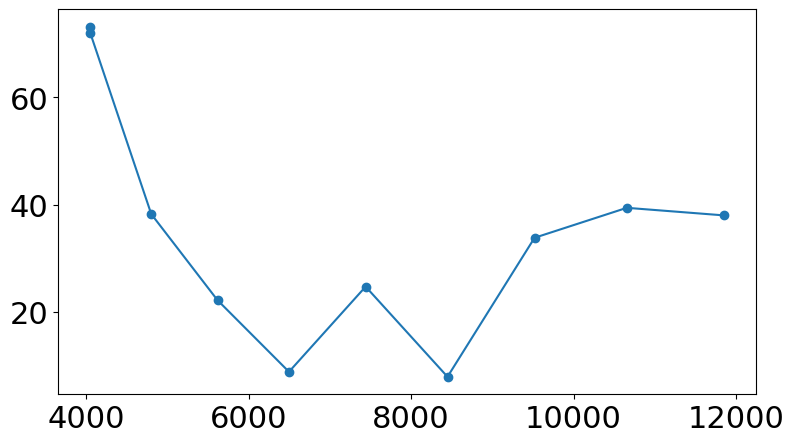

In [24]:
yr = [(1-yo[i] / yb[i])*100 for i in range(len(yo))]

annotateDraw(x, yr)

In [11]:
def readThreads(path, t, validSet=None):
    with open(f"{path}/thread{t}", 'r') as f:
        contents = f.readlines()
    failRate={}
    Time= {}
    for line in contents:
        res = line.split(' ')
        if len(res)<6:
            continue
        id = int(res[0])
        if validSet:
            if id not in validSet:
                continue
        id = f"{t}_{id}"
        failRate[id] = float(res[2]) / float(res[6])
        Time[id] = float(res[4][:-1])
    return failRate, Time


In [12]:
threads =  list(range(1,6))
failFreqGroup = []
validSet = {*range(1,10),*range(43,100)}
for t in threads:
    print(f'threads {t}')
    base, baseTime = readThreads("baseMinor/examples",t,validSet)
    opt, optTime = readThreads("optMinor/examples", t, validSet)
    for k in base.keys():
        if k in opt.keys():
            failFreqGroup.append((k,base[k], opt[k], baseTime[k]/optTime[k]))

    for k in opt.keys():
        if k not in base.keys():
            failFreqGroup.append((k, 0, opt[k], -2))
for i in failFreqGroup:
    print(i)


threads 1
threads 2
threads 3
threads 4
threads 5
('1_1', 0.02, 1.0, 3.887993538681595)
('1_2', 0.12, 0.98, 1.6081463428299296)
('1_3', 0.48, 0.99, 2.796113278882119)
('1_4', 0.09, 0.99, 2.2361429129675146)
('1_6', 0.0, 1.0, 2.9145144736047706)
('1_7', 0.28, 1.0, 2.210429941622412)
('1_8', 0.69, 1.0, 2.591366443011645)
('1_9', 0.07, 0.97, 1.9926964178454267)
('1_43', 0.97, 1.0, 2.1237191300368994)
('1_44', 0.1, 0.79, 1.2241691886982182)
('1_45', 1.0, 1.0, 2.0829725872452816)
('1_46', 0.28, 0.86, 1.364018160150508)
('1_47', 0.97, 1.0, 2.508163097478268)
('1_48', 0.02, 0.55, 0.7845948250759183)
('1_49', 0.96, 1.0, 1.9114308360487808)
('1_50', 0.17, 0.87, 1.589068591142237)
('1_51', 0.31, 0.96, 1.790347022409769)
('1_52', 0.0, 0.19, 0.6969409876292654)
('1_53', 1.0, 1.0, 1.8867557008362348)
('1_54', 0.97, 1.0, 2.4450080560754968)
('1_55', 0.98, 1.0, 2.1641672860467036)
('1_56', 0.14, 0.8, 1.1903270878128838)
('1_57', 0.02, 0.2, 0.6845782836554208)
('1_60', 0.01, 0.23, 0.7390854885122274)


In [13]:
handTest = [(36, 467/500, 1),
                # (39, 17/200, 189/200),
                (40, 122/270, 1),
                (41, 1, 1),
                (42, 446/500, 1),
                (43,1,1),
                (44, 7/102, 56/104),
                (45, 69/100, 1),
                (48, 16/100,80/100),
                (46, 10/100, 80/100),
                (47, 0, 4/100),               
                (49,1,1),
                (50, 0.25, 0.9),
                (51, 0, 0),
                (52, 0.78, 1),
                (53, 0.85,1),
                (54, 0.56,1),
                (55,0.25,1),
                (56, 0.06, .87),
                (57,.69,1),
                # (58, .93,1),
                (59, .85,1),
                (60, .11,.91),
                (61, .41, 1),
                (62, 0, .37),
                (63, 0, .49),
                (64, 0, .12),
                (65,0,.06),
                (66, .64,1),
                (67, 0, .3),
                (68, 0, .49),
                (69, .21,1),
                ]
failFreqGroup += [(a[0], a[1], a[2], -1) for a in handTest]
HardwareInfo = {}
for data in failFreqGroup:
    id = data[0]
    info = dataInfo(id)
    HardwareInfo[id] = info

In [14]:

datas = {120:[], 160:[], 140:[]}
from scipy.interpolate import make_interp_spline
from itertools import groupby
from statistics import mean
for data in failFreqGroup:
    id = data[0]
    info = HardwareInfo[id]
    if data[-1]==-2 and info['Degree_avg'] < 36.3 and info['Var_num']==120:
        continue
    print(data)
    varNum = info['Var_num']
    if varNum not in datas.keys():
        datas[varNum] = []
    datas[varNum].append((data[0], sigDigit(data[1]), sigDigit(data[2]), sigDigit(data[3]), info['Hardware_size'], info['Degree_avg']))
for k in datas.keys():
    print(k)
    datas[k].sort(key=lambda a : a[-1])

    for d in datas[k]:
        print(d)

('1_1', 0.02, 1.0, 3.887993538681595)
('1_2', 0.12, 0.98, 1.6081463428299296)
('1_3', 0.48, 0.99, 2.796113278882119)
('1_4', 0.09, 0.99, 2.2361429129675146)
('1_6', 0.0, 1.0, 2.9145144736047706)
('1_7', 0.28, 1.0, 2.210429941622412)
('1_8', 0.69, 1.0, 2.591366443011645)
('1_9', 0.07, 0.97, 1.9926964178454267)
('1_43', 0.97, 1.0, 2.1237191300368994)
('1_44', 0.1, 0.79, 1.2241691886982182)
('1_45', 1.0, 1.0, 2.0829725872452816)
('1_46', 0.28, 0.86, 1.364018160150508)
('1_47', 0.97, 1.0, 2.508163097478268)
('1_48', 0.02, 0.55, 0.7845948250759183)
('1_49', 0.96, 1.0, 1.9114308360487808)
('1_50', 0.17, 0.87, 1.589068591142237)
('1_51', 0.31, 0.96, 1.790347022409769)
('1_52', 0.0, 0.19, 0.6969409876292654)
('1_53', 1.0, 1.0, 1.8867557008362348)
('1_54', 0.97, 1.0, 2.4450080560754968)
('1_55', 0.98, 1.0, 2.1641672860467036)
('1_56', 0.14, 0.8, 1.1903270878128838)
('1_57', 0.02, 0.2, 0.6845782836554208)
('1_60', 0.01, 0.23, 0.7390854885122274)
('1_61', 0.07, 0.72, 1.1558136665885343)
('1_62', 

In [18]:
plt.rcParams["figure.figsize"] = (9,5)
plt.rcParams.update({'font.size': 22})

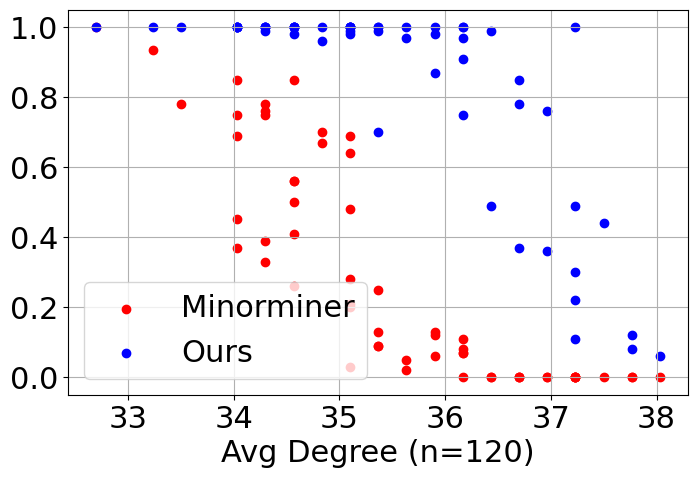

In [16]:

key = 120
toDraw = datas[key]


x = [a[-1] for a in toDraw]
yb = [a[1] for a in toDraw]
yo = [a[2] for a in toDraw]

def annotateAvgGroupDraw(x,y, color, legend):
    # X_Y_Spline = make_interp_spline(x, y)
    # X_ = np.linspace(min(x), max(x), 500)
    # Y_ = X_Y_Spline(X_)
    # plt.plot(X_,Y_,color=color, label=legend)
    points = list(zip(x,y))
    grouper = groupby(points, key=lambda x:x[0])
    newPoints = [(x, mean(yi[1] for yi in y)) for x,y in grouper]
    X = [a[0] for a in newPoints]
    Y = [a[1] for a in newPoints]
    plt.plot(X,Y,color=color, label=legend)
    plt.scatter(X,Y,color=color)

def draw(x,yo,yb,mode):
    if mode == "scatter":
        annotate(x,yb,color='red', legend='Minorminer')
        annotate(x,yo,color='blue', legend="OptMinorminer")
        plt.legend(['Minorminer', 'Ours'])
    elif mode == "line":
        annotateAvgGroupDraw(x,yb,color='red', legend='Minorminer')
        annotateAvgGroupDraw(x,yo,color='blue', legend="OptMinorminer")
        plt.legend()

mode = 'scatter'
draw(x, yo, yb, mode=mode)
plt.xlabel(f'Avg Degree (n={key})')
# plt.ylabel(f'Successful Ratio (n={key})')

plt.grid(True)
# for i in toDraw:
#     print(i)
plt.savefig(f"success{key}.pdf")

113 points
avg ratio: 2.032436492823534


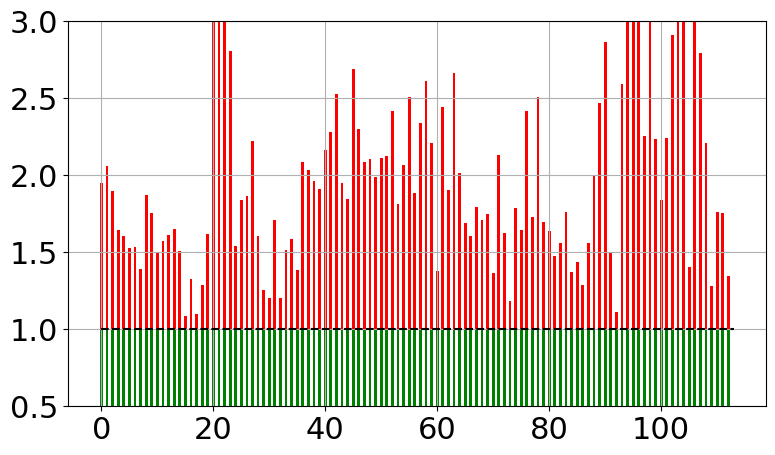

In [19]:
TimeRatio = []
for g in aftGroup[:3] + aftGroup[-1:]:
    for data in g:
        if data['Type']=="Pegasus":
            continue
        r = 1/(1-data['Reduction'])

        TimeRatio.append((data['Degree_avg'], r))
for data in failFreqGroup:
    id = data[0]
    info = HardwareInfo[id]
    if data[1]>0.2 and data[2]>0.2 and data[3]>0:
        TimeRatio.append((info['Degree_avg'],data[3]))
        if data[3]<1:
            print(data)
print(f"{len(TimeRatio)} points")
TimeRatio.sort(key=lambda a:a[0])
x = [i for i in range(len(TimeRatio))]
values = np.array([a[1] for a in TimeRatio])
print(f"avg ratio: {sum(values) / len(values)}")
threshold = 1
above_threshold = np.maximum(values - threshold, 0)
below_threshold = np.minimum(values, threshold)

# and plot it
fig, ax = plt.subplots()
width = 0.5
plt.bar(x, below_threshold, width, color="g")
plt.bar(x, above_threshold, width, color="r",
        bottom=below_threshold)
plt.ylim((0.5,3))
# horizontal line indicating the threshold
plt.plot([0., len(x)], [threshold, threshold], "k--")
plt.grid()
plt.savefig("time.pdf")

In [13]:
dlist = [(k, G.degree(k)) for k in G.nodes()]
dlist.sort(key=lambda a:a[1], reverse=True)
vorder = [i[0] for i in dlist]
with open('out', 'w') as f:
    f.write(str(vorder))

In [43]:
import scipy
import scipy.sparse
import numpy as np
import random
import os
index=15
dim = 25
s = 5
a = scipy.sparse.random(dim, dim, (s/dim/2)).toarray()

for i in range(a.shape[0]):
    if sum(a[i])==0:
        ind = random.randint(0, a.shape[0]-1)
        a[i, ind] = 1
a = (a+a.T) / 2
for i in range(a.shape[0]):
    print(a[i])
np.save('bench', a)
os.system(f'cp bench.npy data{index}.npy')

[0.         0.         0.         0.22383838 0.         0.
 0.         0.45481082 0.         0.         0.         0.
 0.         0.         0.17235277 0.         0.         0.
 0.         0.2390568  0.32339311 0.         0.         0.
 0.        ]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.46013249 0.         0.         0.31675478
 0.         0.         0.         0.         0.         0.
 0.02827874]
[0.         0.         0.76526797 0.         0.         0.
 0.         0.01387697 0.         0.         0.         0.
 0.         0.49970354 0.         0.33210335 0.         0.36850732
 0.32544353 0.         0.         0.         0.         0.
 0.        ]
[0.22383838 0.         0.         0.79229216 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.19399641 0.         0.
 0.         0.         0.48532968 0.         0.         0.
 

0

In [38]:
G=nx.barabasi_albert_graph(10,3)
for i in range(10):
    print(list(G.neighbors(i)))

[1, 2, 3, 4, 5, 7, 8, 9]
[0, 4]
[0, 4, 5, 6]
[0]
[0, 1, 2, 5, 6, 7, 8, 9]
[0, 2, 4, 6, 7, 8]
[2, 4, 5]
[0, 4, 5, 9]
[0, 4, 5]
[0, 4, 7]
